In [32]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 150

# Пункт А

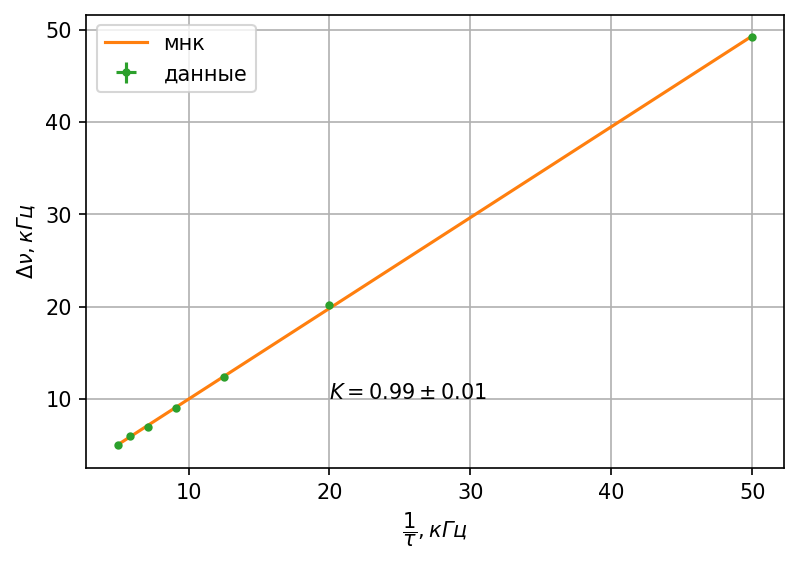

In [43]:
def line(arr, a, b):
    return a * arr + b

tau = np.array([20, 50, 80, 110, 140, 170, 200], dtype=np.float64) #1e-6 sec
tau /= 1e3 # 1e-3 sec
d_nu = np.array([49.2, 20.2, 12.4, 9, 7, 6, 5], dtype=np.float64) #кГц
sigma_d_nu = 0.2 # кГц

#plot
plt.plot(1/tau, d_nu, 'o', markersize=0)
plt.xlabel(r'$\dfrac{1}{\tau}, кГц$')
plt.ylabel(r'$\Delta \nu, кГц$')

#curve fit
popt, pcov = curve_fit(line, 1/tau, d_nu, absolute_sigma=True, sigma=[sigma_d_nu]*len(tau))
plt.plot(1/tau, line(1/tau, *popt), label='мнк')

#errors
plt.errorbar(1/tau, d_nu, xerr=0, yerr=[sigma_d_nu]*len(tau), fmt='o', markersize=3, label='данные')

plt.legend()
plt.grid()
plt.text(20, 10, r'$K = 0.99 \pm 0.01$')
plt.show()


# Пункт Б

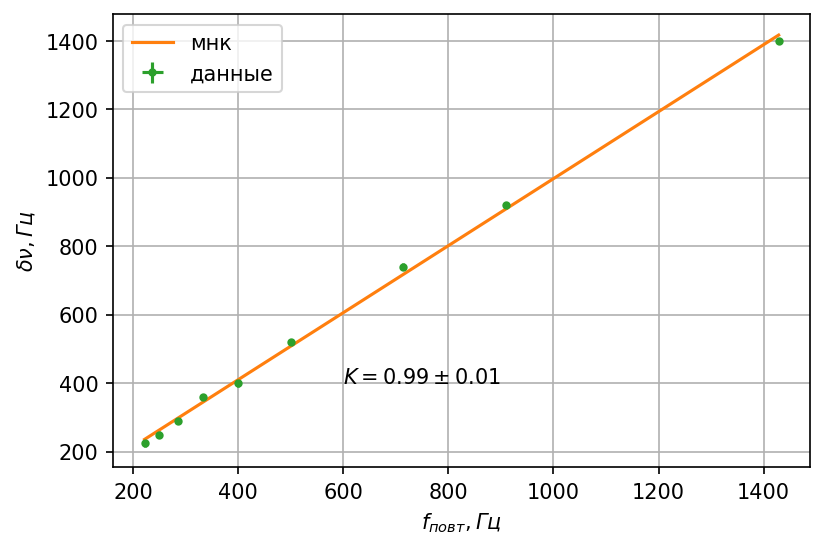

In [51]:
T = np.array([0.7, 1.1, 1.4, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], dtype=np.float64) #мс
T *= 1e-3
delta_v = np.array([1400, 920, 740, 520, 400, 360, 290, 250, 224], dtype=np.float64) #Гц
sigma_delta_v = [10] * len(delta_v) #Гц

#plot
plt.plot(1/T, delta_v, 'o', markersize=0)
plt.xlabel(r'$f_{повт}, Гц$')
plt.ylabel(r'$\delta \nu, Гц$')

#curve fit
popt, pcov = curve_fit(line, 1/T, delta_v)
plt.plot(1/T, line(1/T, *popt), label='мнк')

#errors
plt.errorbar(1/T, delta_v, xerr=0, yerr=sigma_delta_v, fmt='o', label='данные', markersize=3)


plt.legend()
plt.grid()
plt.text(600, 400, r'$K = 0.99 \pm 0.01$')
plt.show()

# Пункт В

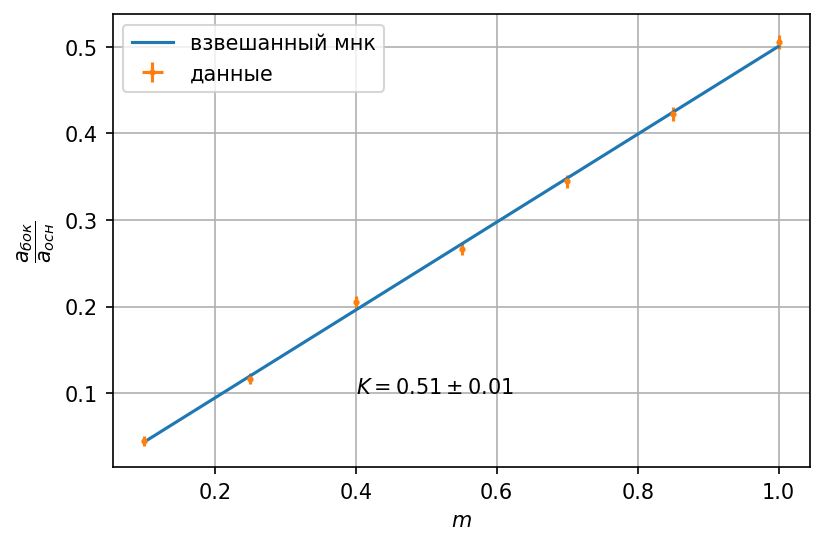

In [30]:
m = np.array([10, 25, 40, 55, 70, 85, 100], dtype=np.float64) # %
m /= 100 # m in [0, 1]
a_side = np.array([32, 84, 148, 192, 248, 304, 364], dtype=np.float64) # mV
a_main = np.array([724, 720, 720, 720, 720, 720, 720], dtype=np.float64) # mV

#errors 
sigma_a = 4 #mV
sigma_a_array = []
for i in range(len(m)):
    sigma_a_array.append(a_side[i]/a_main[i] * (sigma_a/a_side[i] + sigma_a/a_main[i]) )
#plot
#plt.plot(m, a_side/a_main, 'o', label='данные')

#curve fit
popt, pcov = curve_fit(line, m, a_side/a_main, absolute_sigma=True, sigma=sigma_a_array)
plt.plot(m, line(m, *popt), label='взвешанный мнк')

#errorbar
plt.errorbar(m, a_side/a_main, xerr=0, yerr=sigma_a_array, fmt='o', markersize=2, label='данные')



plt.text(0.4, 0.1, r'$K = 0.51 \pm 0.01$')
plt.ylabel(r'$\dfrac{a_{бок}}{a_{осн}}$')
plt.xlabel(r'$m$')
plt.legend()
plt.grid()
plt.show()